In [5]:
# Importing all at once
from MultiVariateNormal import MultiVariateNorm, MVN_Correlation_Matrix, MVN_Dispersion_Matrix
from MultiVariateNormal import read_data, MANOVA as M
from MultiVariateNormal import Hotelling_T2 as HT2

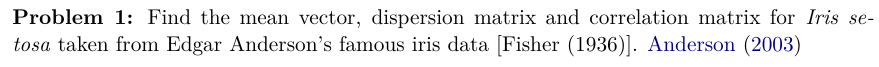

In [6]:
## 1
# MANOVA is used for dividing the population 
df1, df2, df3 = M.pop_seperator("DATASETS\Iris.csv", by = "Species")
mvn1 = read_data(df1)
print("Mean vector is\n",mvn1.mean_vector,end= "\n\n")
print("Dispersion matrix is\n",mvn1.var_cov_matrix,end= "\n\n")
print("Correlation matrix is\n",mvn1.correlation_matrix,end= "\n\n")

Mean vector is
 [[5.006]
 [3.428]
 [1.462]
 [0.246]]

Dispersion matrix is
 [[0.1242 0.0992 0.0164 0.0103]
 [0.0992 0.1437 0.0117 0.0093]
 [0.0164 0.0117 0.0302 0.0061]
 [0.0103 0.0093 0.0061 0.0111]]

Correlation matrix is
 [[1.   0.74 0.27 0.28]
 [0.74 1.   0.18 0.23]
 [0.27 0.18 1.   0.33]
 [0.28 0.23 0.33 1.  ]]



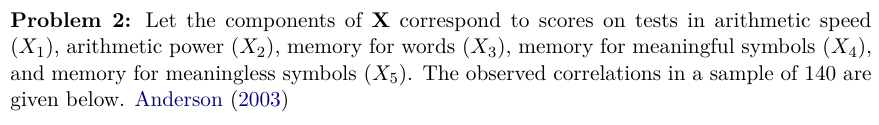

In [7]:
## 2
corr_matrix = [[1.0000, 0.4248, 0.0420, 0.0215, 0.0573],[0.4248, 1.0000, 0.1487, 0.2489, 0.2843],[0.0420, 0.1487, 1.0000, 0.6693, 0.4662],[0.0215, 0.2489, 0.6693, 1.0000, 0.6915],[0.0573, 0.2843, 0.4662, 0.6915, 1.000]]
mvn2 = MVN_Correlation_Matrix(corr_matrix)
corr45_3 = mvn2.partial_correlation( i = [4,5], constant = [3])
print("The partial correlation between X4 and X5, holding X3 fixed is",corr45_3)
corr12_345 = mvn2.partial_correlation(i = [1,2], constant = [3,4,5])
print("The partial correlation between X1 and X2, holding X3, X4 and X5 fixed is",corr12_345)
corr1_345 = mvn2.multiple_correlation( x = 1 , independent_set = [3,4,5])
print("The multiple correlation between X1 and the set X3, X4 and X5 is",corr1_345)

The partial correlation between X4 and X5, holding X3 fixed is 0.58
The partial correlation between X1 and X2, holding X3, X4 and X5 fixed is 0.44
The multiple correlation between X1 and the set X3, X4 and X5 is 0.07


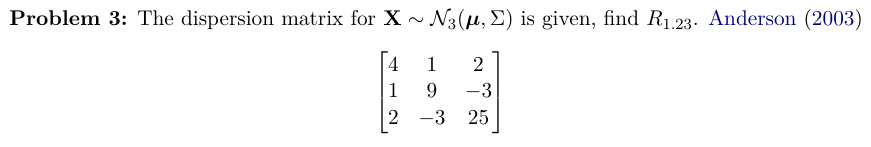

In [8]:
## 3
var_cov_matrix = [[4,1,2],[1,9,-3],[2,-3,25]]
mvn3 = MVN_Dispersion_Matrix(var_cov_matrix)
corr1_23 = mvn3.multiple_correlation(x = 1, independent_set= [2,3])
print("R1.23 is",corr1_23)

R1.23 is 0.29


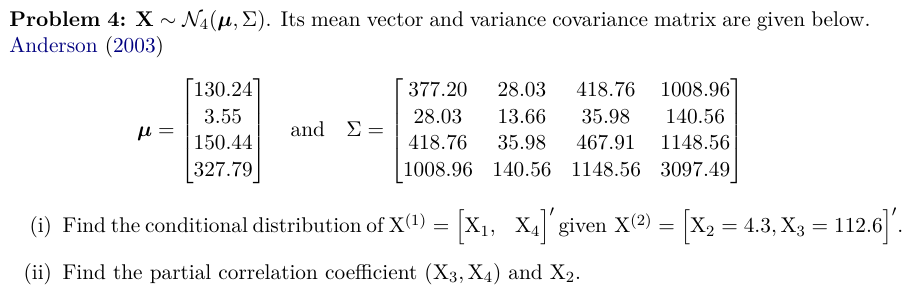

In [9]:
## 4
mean = [130.24, 3.55, 150.44, 327.79]
var_cov_matrix = [[377.20,28.03,418.76,1008.96],[28.03,13.66,35.98,140.56],[418.76,35.98,467.91,1148.56],[1008.96,140.56,1148.56,3097.49]]
mvn4 = MultiVariateNorm(mean, var_cov_matrix)
mvn4.conditional(i =[1,4], j= [2,3], given_values_j = [4.3, 112.6]).info()
corr34_2 = mvn4.partial_correlation(i = [3,4], constant = [2])
print("The partial correlation coefficient (X3, X4) and (X2) is",corr34_2)

                                   2-Variate Normal Distribution                                    

--------------------------------------------Mean vector--------------------------------------------- 
[[ 94.97]
 [252.46]]
-----------------------------------------Dispersion matrix------------------------------------------ 
[[ 0.83  1.05]
 [ 1.05 27.63]]
The partial correlation coefficient (X3, X4) and (X2) is 0.99


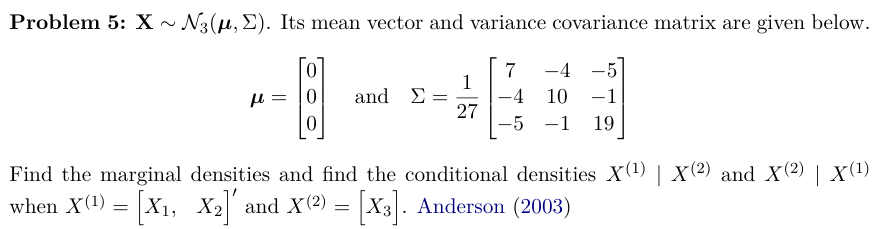

In [10]:
## 5
mean = [0,0,0]
var_cov_matrix = [[7/27,-4/27,-5/27],[-4/27,10/27,-1/27],[-5/27,-1/27,19/27]]
mvn5= MultiVariateNorm(mean, var_cov_matrix)
mvn5.info()
print("\nMarginal of X(1) is")
mvn5.marginal(i = [1,2]).info()
print("\nMarginal of X(2) is ")
mvn5.marginal(i = [3]).info()
print("\nConditional of X(1) | X(2) is")
mvn5.conditional(i = [1,2], j = [3])
print("\nConditional of X(2) | X(1) is")
mvn5.conditional(i = [3], j = [1,2])

                                   3-Variate Normal Distribution                                    

--------------------------------------------Mean vector--------------------------------------------- 
[[0]
 [0]
 [0]]
-----------------------------------------Dispersion matrix------------------------------------------ 
[[ 0.26 -0.15 -0.19]
 [-0.15  0.37 -0.04]
 [-0.19 -0.04  0.7 ]]

Marginal of X(1) is
                                   2-Variate Normal Distribution                                    

--------------------------------------------Mean vector--------------------------------------------- 
[[0]
 [0]]
-----------------------------------------Dispersion matrix------------------------------------------ 
[[ 0.26 -0.15]
 [-0.15  0.37]]

Marginal of X(2) is 
                                   1-Variate Normal Distribution                                    

--------------------------------------------Mean vector--------------------------------------------- 
[[0]]
-------------

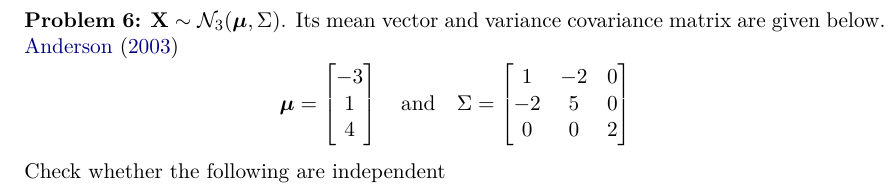
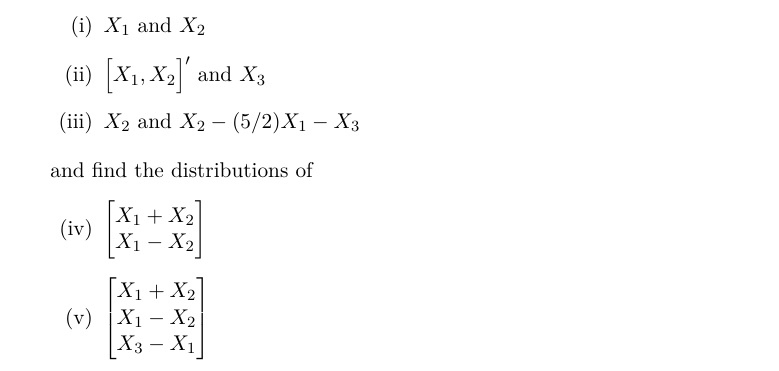

In [11]:
## 6
mean = [-3, 1, 4]
var = [[1,-2,0],[-2,5,0],[0,0,2]]
mvn6 = MultiVariateNorm(mean, var)
# X1 and X2
mvn6.multi_independent(component1 = [1], component2 = [2])
# [X1, X2] and [X3]
mvn6.multi_independent(component1 = [1,2], component2 = [3])
# X2 and X2 - (5/2)X1 - X3
mvn6.linear_independent(Coeff1 = [0,1,0], Coeff2 = [-5/2,1,-1])
# Resultant distributions
mvn6.distribution(Coeff_matrix = [[1,1,0],[1,-1,0]]).info()
mvn6.distribution(Coeff_matrix = [[1,1,0],[1,-1,0],[-1,0,1]]).info()

Not independent
Independent
Not independent
                                   2-Variate Normal Distribution                                    

--------------------------------------------Mean vector--------------------------------------------- 
[[-2]
 [-4]]
-----------------------------------------Dispersion matrix------------------------------------------ 
[[ 2 -4]
 [-4 10]]
                                   3-Variate Normal Distribution                                    

--------------------------------------------Mean vector--------------------------------------------- 
[[-2]
 [-4]
 [ 7]]
-----------------------------------------Dispersion matrix------------------------------------------ 
[[ 2 -4  1]
 [-4 10 -3]
 [ 1 -3  3]]


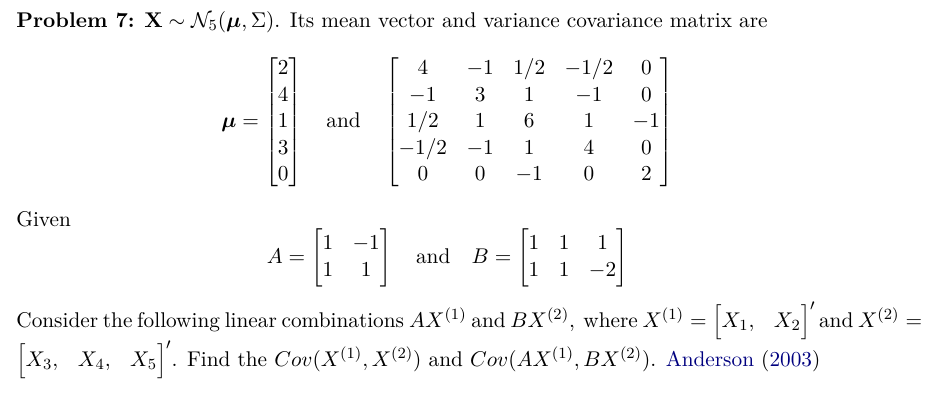

In [12]:
## 7
mean = [2,4,1,3,0]
var = [[4,-1,1/2,-1/2,0],[-1,3,1,-1,0],[1/2,1,6,1,-1],[-1/2,-1,1,4,0],[0,0,-1,0,2]]
mvn7 = MultiVariateNorm(mean,var)
mvn7.info()
print("\nCov(X(1),X(2))\n", mvn7.covariance([1,2],[3,4,5]))
print("\nCov(AX(1),BX(2))\n", mvn7.special_covariance(i =[1,2],j = [3,4,5],Coeff1 = [[1,-1],[1,1]],Coeff2 =[[1,1,1],[1,1,-2]]))

                                   5-Variate Normal Distribution                                    

--------------------------------------------Mean vector--------------------------------------------- 
[[2]
 [4]
 [1]
 [3]
 [0]]
-----------------------------------------Dispersion matrix------------------------------------------ 
[[ 4.  -1.   0.5 -0.5  0. ]
 [-1.   3.   1.  -1.   0. ]
 [ 0.5  1.   6.   1.  -1. ]
 [-0.5 -1.   1.   4.   0. ]
 [ 0.   0.  -1.   0.   2. ]]

Cov(X(1),X(2))
 [[ 0.5 -0.5  0. ]
 [ 1.  -1.   0. ]]

Cov(AX(1),BX(2))
 [[0. 0.]
 [0. 0.]]


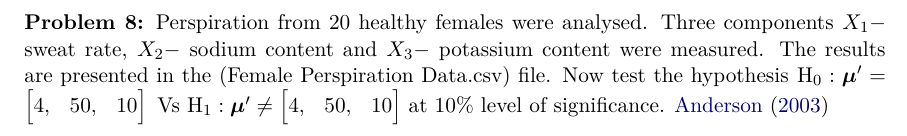

                                      Hotelling T-Square Test                                       
----------------------------------------------------------------------------------------------------
The test statistic value is T2 : 9.74
Level of significance : 0.1
F distribution : F(3, 17) degrees of freedom
p - value : 0.0649
Decision : we reject the null hypothesis with 90.0 % confidence level


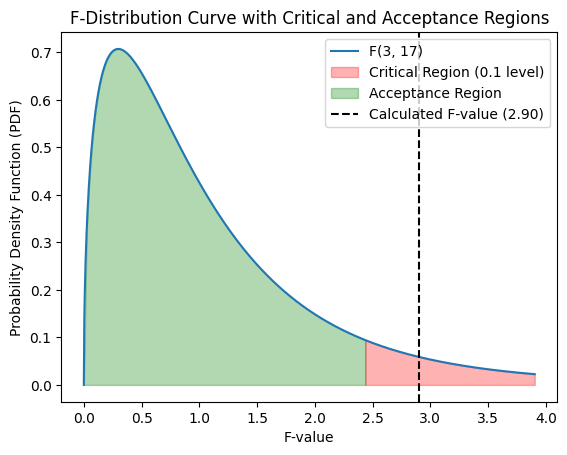

In [13]:
## 8
HT2.one_sample("DATASETS\Female Perspiration Data.csv", mean = [4, 50, 10], size = 0.10, plot = True)

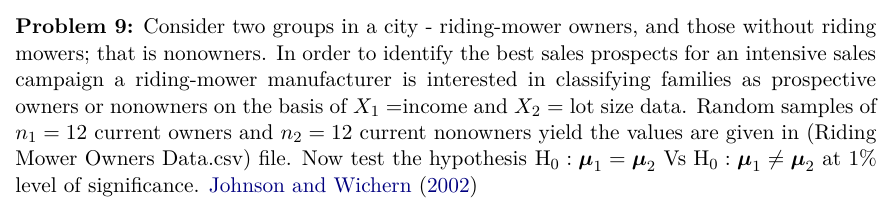

In [14]:
## 9
df1, df2 = HT2.pop_seperator("DATASETS\Riding Mower Owners Data.csv", by = "ownership")
## 9.1 Assuming Equal Covariance
HT2.two_sample(df1, df2, size = 0.01, equal_cov = True,  plot = True)
## 9.2 Testing Equal Covariance
HT2.two_sample(df1, df2, size = 0.01, equal_cov = "BoxM-test",  plot = True)

                                      Hotelling T-Square Test                                       
----------------------------------------------------------------------------------------------------
The test statistic value is T2 : 25.68
Level of significance : 0.01
F distribution : F(2, 21) degrees of freedom
p - value : 0.0003
Decision : we reject the null hypothesis with 99.0 % confidence level
Oops! Visualization is not appropriate for this problem
                                      Hotelling T-Square Test                                       
----------------------------------------------------------------------------------------------------
The test statistic value is T2 : 25.68
Level of significance : 0.01
F distribution : F(2, 10) degrees of freedom
p - value : 0.0024
Decision : we reject the null hypothesis with 99.0 % confidence level
Oops! Visualization is not appropriate for this problem


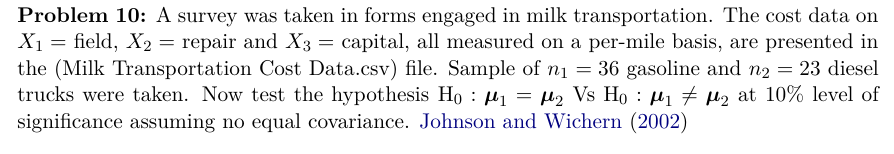

In [15]:
## 10
df1, df2 = HT2.pop_seperator("DATASETS\Milk Transportation Cost Data.csv", by = "type")
HT2.two_sample(df1, df2, size = 0.10, equal_cov = False,  plot = True)

                                      Hotelling T-Square Test                                       
----------------------------------------------------------------------------------------------------
The test statistic value is T2 : 37.5
Level of significance : 0.1
F distribution : F(3, 20) degrees of freedom
p - value : 0.0001
Decision : we reject the null hypothesis with 90.0 % confidence level
Oops! Visualization is not appropriate for this problem


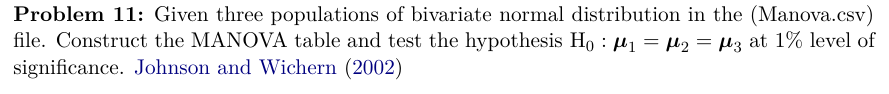

        MANOVA : Sum of Squares and Cross Product Matrix with associated Degrees of Freedom         
---------------------------------------------Treatment----------------------------------------------
[[ 78. -12.]
 [-12.  48.]]    with 2 df

----------------------------------------------Residual----------------------------------------------
[[10.  1.]
 [ 1. 24.]]    with 5 df

------------------------------------------Total(corrected)------------------------------------------
[[ 88. -11.]
 [-11.  72.]]    with 7 df


                                      Hypothesis Test Results                                       
----------------------------------------------------------------------------------------------------
The test statistic value is (wilk's lambda) : 0.04
Level of significance : 0.01
F distribution : F(4, 8) degrees of freedom
p - value : 0.0062
Decision : we reject the null hypothesis with 99.0 % confidence level


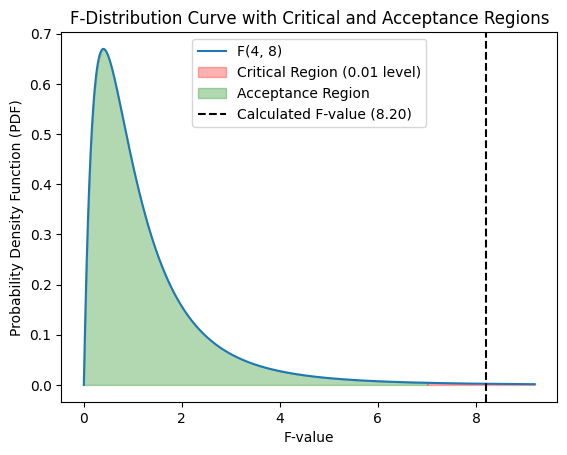

In [16]:
## 11
df1, df2, df3 = M.pop_seperator("DATASETS\Manova.csv",by = "pop")
M.test(df1, df2, df3, manova_table = True, size = 0.01 , plot = True)